In [39]:
# Preprocessing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
#from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /Users/Nata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Nata/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
df = pd.read_csv(r"/Users/Nata/Downloads/emails (1).csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [41]:
# Replace spam labels
df = df.replace({'spam': {1: 'Spam', 0: 'Ham'}})

# Rename columns for clarity
df = df.rename(columns={'spam': 'Spam or Ham', 'text': 'Email Text'})

# Displaying basic dataset info
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing vals
print("\nMissing Values:")
print(df.isnull().sum())

# Summary of text lengths
df["Text Length"] = df["Email Text"].apply(lambda x: len(str(x)))
print("\nText Length Statistics:")
print(df["Text Length"].describe())

Dataset Shape: (5728, 2)
Column Names: Index(['Email Text', 'Spam or Ham'], dtype='object')

First 5 rows:
                                          Email Text Spam or Ham
0  Subject: naturally irresistible your corporate...        Spam
1  Subject: the stock trading gunslinger  fanny i...        Spam
2  Subject: unbelievable new homes made easy  im ...        Spam
3  Subject: 4 color printing special  request add...        Spam
4  Subject: do not have money , get software cds ...        Spam

Missing Values:
Email Text     0
Spam or Ham    0
dtype: int64

Text Length Statistics:
count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: Text Length, dtype: float64


In [42]:
df.head()

,Email Text,Spam or Ham,Text Length
0,Subject: naturally irresistible your corporate...,Spam,1484
1,Subject: the stock trading gunslinger fanny i...,Spam,598
2,Subject: unbelievable new homes made easy im ...,Spam,448
3,Subject: 4 color printing special request add...,Spam,500
4,"Subject: do not have money , get software cds ...",Spam,235


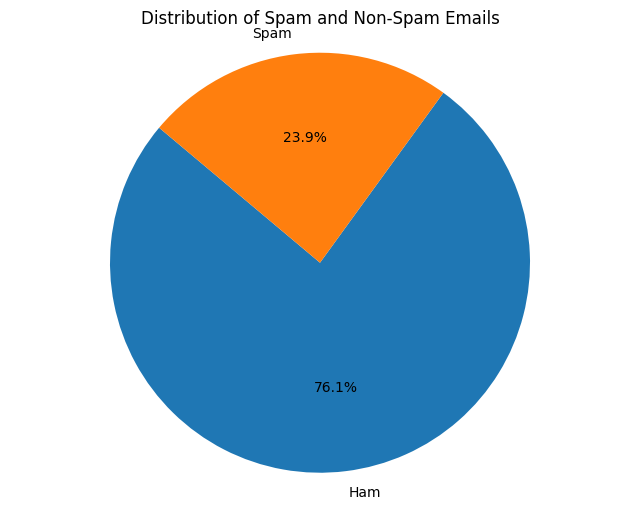

In [45]:
df['Spam or Ham'].value_counts()

# Percentage of Emails that are Spam and Not Spam
plt.figure(figsize=(8, 6))
plt.pie(df['Spam or Ham'].value_counts(), labels=df['Spam or Ham'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()

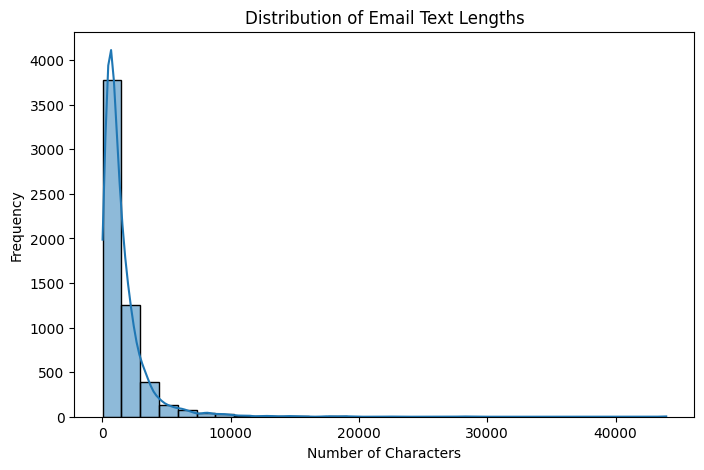

In [46]:
# Visualize distribution of email lengths
plt.figure(figsize=(8, 5))
sns.histplot(df["Text Length"], bins=30, kde=True)
plt.title("Distribution of Email Text Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

Average Character Count of Spam Emails: 1317.2573099415204
Average Character Count of Ham Emails: 1631.918119266055


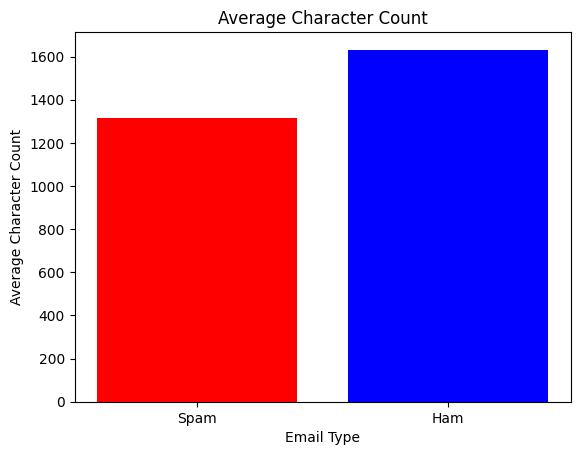

In [50]:
avg_length_spam = df[df['Spam or Ham'] == 'Spam']['Text Length'].mean()
avg_length_ham = df[df['Spam or Ham'] == 'Ham']['Text Length'].mean()

# Average Character Count of Spam and Ham Emails
print("Average Character Count of Spam Emails:", avg_length_spam)
print("Average Character Count of Ham Emails:", avg_length_ham)
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['red', 'Blue'])
plt.title('Average Character Count')
plt.xlabel('Email Type')
plt.ylabel('Average Character Count')
plt.show()

Average Words of Spam Emails: 267.89619883040933
Average Words of Ham Emails: 346.83532110091744


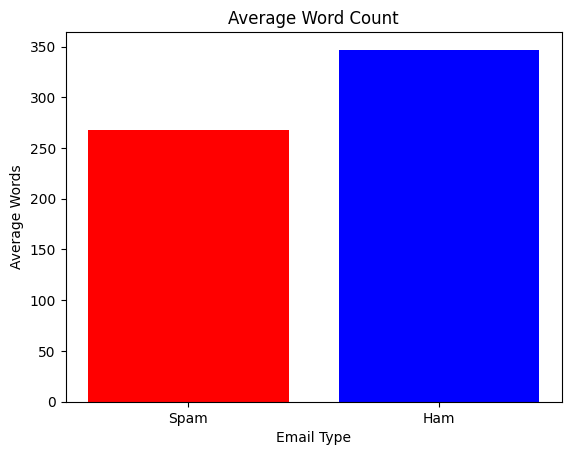

In [51]:
df['Word Count'] = df['Email Text'].apply(nltk.word_tokenize).apply(len)
avg_words_spam = df[df['Spam or Ham'] == 'Spam']['Word Count'].mean()
avg_words_ham = df[df['Spam or Ham'] == 'Ham']['Word Count'].mean()

# Average Words of Spam and Ham Emails
print("Average Words of Spam Emails:", avg_words_spam)
print("Average Words of Ham Emails:", avg_words_ham)
plt.bar(['Spam', 'Ham'], [avg_words_spam, avg_words_ham], color=['red', 'Blue'])
plt.title('Average Word Count')
plt.xlabel('Email Type')
plt.ylabel('Average Words')
plt.show()

Average Sentences of Spam Emails: 18.274122807017545
Average Sentences of Ham Emails: 19.86261467889908


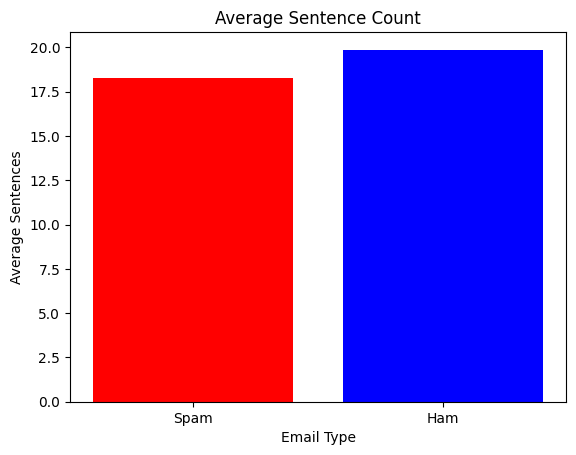

In [53]:
df['Sentence Count'] = df['Email Text'].apply(nltk.sent_tokenize).apply(len)
avg_sentence_spam = df[df['Spam or Ham'] == 'Spam']['Sentence Count'].mean()
avg_sentence_ham = df[df['Spam or Ham'] == 'Ham']['Sentence Count'].mean()

# Average Sentences of Spam and Ham Emails
print("Average Sentences of Spam Emails:", avg_sentence_spam)
print("Average Sentences of Ham Emails:", avg_sentence_ham)
plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['red', 'Blue'])
plt.title('Average Sentence Count')
plt.xlabel('Email Type')
plt.ylabel('Average Sentences')
plt.show()

In [54]:
# word frequency analysis
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    words = text.split()
    return words

# Flatten word lists for each category
spam_words = []
not_spam_words = []

for index, row in df.iterrows():
    words = preprocess_text(str(row["Email Text"]))
    if row["Spam or Ham"] == "Spam":
        spam_words.extend(words)
    else:
        not_spam_words.extend(words)

# Getting most common words in each category
spam_common = Counter(spam_words).most_common(20)
not_spam_common = Counter(not_spam_words).most_common(20)

print("\nMost Common Words in Spam Emails:")
print(spam_common)

print("\nMost Common Words in Ham Emails:")
print(not_spam_common)


Most Common Words in Spam Emails:
[('_', 13556), ('the', 8975), ('to', 8165), ('and', 6517), ('of', 5629), ('you', 4920), ('a', 4700), ('in', 3886), ('your', 3730), ('for', 3186), ('is', 2977), ('this', 2822), ('that', 1896), ('i', 1777), ('with', 1734), ('we', 1724), ('be', 1675), ('are', 1590), ('or', 1588), ('it', 1584)]

Most Common Words in Ham Emails:
[('the', 41135), ('to', 33571), ('and', 20961), ('of', 18128), ('i', 15649), ('a', 15250), ('you', 14234), ('in', 14096), ('for', 13510), ('enron', 13382), ('ect', 11417), ('on', 11137), ('is', 9618), ('subject', 8605), ('vince', 8531), ('be', 7587), ('that', 7395), ('this', 7209), ('with', 7119), ('we', 6964)]


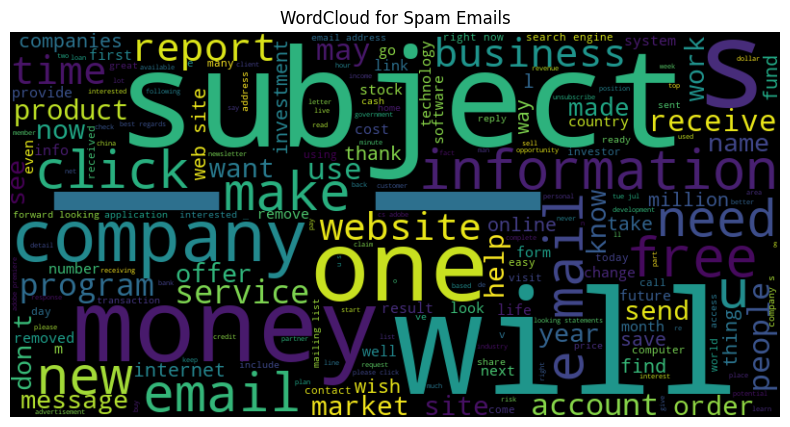

In [55]:
# Word cloud visualization for spam emails
spam_text = " ".join(spam_words)
wordcloud_spam = WordCloud(width=800, height=400, background_color="black").generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Spam Emails")
plt.show()

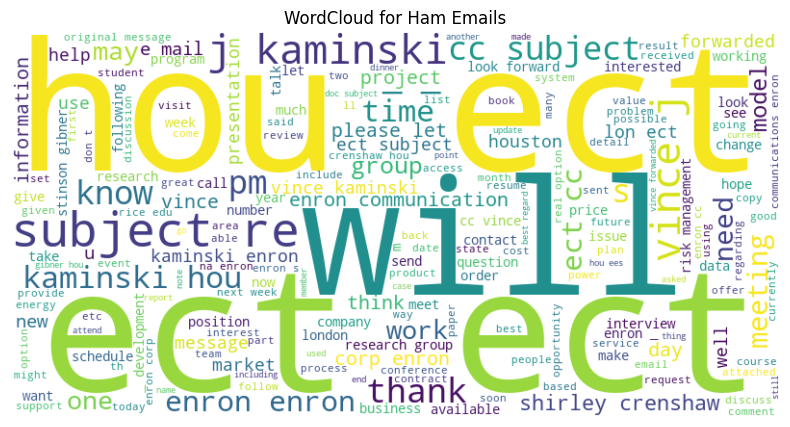

In [56]:
# Word cloud visualization for non-spam emails
not_spam_text = " ".join(not_spam_words)
wordcloud_not_spam = WordCloud(width=800, height=400, background_color="white").generate(not_spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_spam, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Ham Emails")
plt.show()